
# Desafio de detecção e redução e redução de fraudes no setor financeiro

## Contexto

Embora muito se fale da capacidade de geração de receita das empresas, um dos principais entraves para o sucesso de um negócio está atrelado ao seu custo. A captação de clientes se tornou cada vez mais penosa, assim como a manutenção da carteira. Com isso, a gestão de custo se tornou um fator extremamente estratégico para garantir a margem e o crescimento das empresas.

No entanto, o advento no mundo digital para expandir o negócio ou garantir a sua sobrevivência enfrenta um grande desafio para redução do custo operacional: as fraudes, sobretudo as relacionadas às operações comerciais e financeiras, que impactam, na prática, todos os tipos de indústrias e setores da economia. Do governo, ao banco, do varejista ao microempreendedor, todos precisam conhecer e enfrentar este desafio.

Considerando que o objetivo dos fraudadores em geral é terem benefícios monetários, torna evidente que o setor financeiro é um dos seus principais alvos. Mesmo o crescente investimento em ações preventivas e de monitoramento não têm sido suficientes para barrar ou frear a escalada dos criminosos. De acordo com a Psafe (https://www.psafe.com/), de janeiro a agosto do ano passado foram 920 mil casos somente no Brasil e a cada minuto, 3,6 fraudes acontecem no país. Foram detectados, por exemplo, mais de 11 milhões de tentativas de fishing bancário.

Não à toa, no relatório de novembro de 2020 (https://api.abecs.org.br/wp-content/uploads/2020/11/Apresentacao-Balanco-3T20.pdf) é listado entre as prioridades do setor financeiro a redução da fraude e a utilização de sistema de inteligência artificial para monitoramento dela. De acordo com a Febraban para mitigar este risco é previsto um gasto anual da ordem de R$ 2 bilhões de reais em TI por ano no Brasil. Porém, o risco é potencializado não somente pela sofisticação dos cyber criminosos, mas também pela insatisfação do consumidor que não só abandona a carteira de clientes, como também se utilizam do próprio código do consumidor, que garante indenização em dobro dos valores cobrados. Tudo isso, sem considerar as ações judiciais por danos morais e materiais que podem ser impetradas pelo consumidor. Segundo o Conselho Nacional de Justiça, a projeção é que 28% das ações em trâmite tenham como réus instituições financeiras.

Neste desafio, precisamos propor uma solução para detecção e análise de fraudes que possam reduzir os riscos da empresa e garantir margens saudáveis.

## Base de dados 

A base de dados que será utilizada para o desenvolvimento deste projeto contém aproximadamente 6,3 milhões de transações. Estas transações podem ser de diferentes tipo e foram executadas via mobile devices. As features contidas nesta base de dados são:

* **step:** Representa o total de horas transcorrido desde o início da simulação. Esta feature vai variar entre 1 e 744 (30 dias);

* **nameOrig:** Cliente que iniciou a transação

* **oldbalanceOrg:** Saldo da conta de origem antes da transação;

* **newbalanceOrig:** Saldo da conta de origem após a transação;

* **nameDest:** Cliente de destino da transação;

* **oldbalanceDest:** Saldo da conta de destino antes da transação;

* **newbalanceDest:** Saldo da conta de destino após a transação;

* **isFraud:** Flag que define se a transação é fraudulenta ou não. Nesta simulação o objetivo da fraude é assumir a conta do usuário, esvaziá-la transferindo para outra conta e então sacando o dinheiro.

* **isFlaggedFraud:** Automaticamente marcadas pelo banco como fraude por tentarem transferir mais de 200.000 em uma única transação.

## Objetivos do projeto

* Quais variáveis valem a pena serem mantidas?

* Qual modelo de classificação melhor se adapta ao nosso projeto?

* Seu custo computacional vale a pena?

*  Quais observações podem ser feitas com relação aos impactos dos falsos positivos e falsos negativos?

## Bibliotecas 

In [ ]:
# Bibliotecas para análise dos dados 

import pandas as pd
import numpy as np 
import time
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Normalizar os dados 
from sklearn.preprocessing import RobustScaler, StandardScaler, OrdinalEncoder, LabelEncoder, Normalizer

# Redução de dimensionalidade 
from sklearn.manifold import TSNE

# Métricas 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# bibliotecas para plotar as curvas de aprendizado e curva roc
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

# Algoritimos de regressão
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Finetunning
from sklearn.model_selection import GridSearchCV

# Bibliotecas gráficas
import seaborn as sns 
import matplotlib.pyplot as plt

# Eliminar os avisoss 
import warnings
warnings.filterwarnings(action = 'ignore')

## Download dos dados

Como mencionado acima, o dataset contem 6,3 milhôes de transações. Foi realizado o download do dataset e seu upload foi feito para o Google drive.

In [ ]:
# Montando o Google Drive para realizar o download do arquivo. Esta maneira é mais rápida do que fazer a leitura através de um link da internet.

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Importa a planilha csv

data = pd.read_csv('/content/gdrive/My Drive/fraud_detection_dataset.csv')

In [ ]:
data.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


O Dtype das variáveis parecem estar corretos.

## Análise exploratória 

Para realizar o EDA neste dataset, irei utilizar uma abordagem diferente. Nós iremos testar uma biblioteca desenvolvida para realizar uma análise automática dos dados, a **DataPrep**. De acordo com o site do desenvolvedor, DataPrep é a ferramenta de EDA mais fácil e rápida usada no python. Ela nos permite entender um dataframe em pandas com algumas linhas de código.

Mais informações sobre **DataPrep** [AQUI.](https://docs.dataprep.ai/index.html)

In [ ]:
# Instala a biblioteca

!pip install dataprep --quiet

     |████████████████████████████████| 9.5 MB 4.6 MB/s 
     |████████████████████████████████| 965 kB 51.7 MB/s 
     |████████████████████████████████| 1.1 MB 57.0 MB/s 
     |████████████████████████████████| 28.5 MB 1.6 MB/s 
     |████████████████████████████████| 435 kB 74.1 MB/s 
     |████████████████████████████████| 943 kB 50.3 MB/s 
     |████████████████████████████████| 749 kB 51.1 MB/s 
     |████████████████████████████████| 95 kB 4.6 MB/s 
     |████████████████████████████████| 78 kB 5.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 133 kB 69.6 MB/s 
     |████████████████████████████████| 50 kB 5.6 MB/s 
     |████████████████████████████████| 1.0 MB 55.7 MB/s 
     |████████████████████████████████| 271 kB 63.1 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
     |████████████████████████████████| 144 kB 73.2 MB/s 
     |███████

In [ ]:
from dataprep.eda import plot, plot_correlation, create_report, plot_missing

CPU times: user 8min 28s, sys: 9.67 s, total: 8min 38s
Wall time: 6min 5s


DataPrep Report
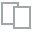
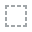
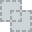
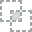
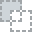
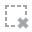
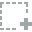
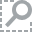
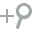
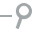
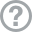
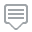
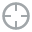
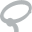
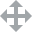
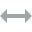
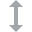
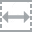
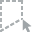
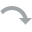
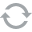
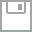
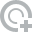
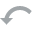
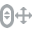
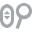
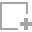
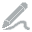
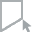
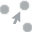
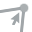
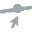

In [ ]:
create_report(data)

Informações úteis que se pode tirar deste EDA:

* Variáveis amount, **oldbalanceOrg**, **newbalanceOrig**, **oldbalanceDest** e **newbalanceDest** são assimétricas. 
* Variáveis **nameOrig** e **nameDest** possuem cardinalidade alta, por este motivo iremos deletá-las
* A maioria das transações demorou até 400 horas. Podemos pensar: Será que transações fraudulentas demoram mais?
* Analisando os gráficos das variáveis **oldbalanceOrg** e **newbalanceOrig** vem a pergunta: Como é possível que o saldo da conta seja 0 no início? Bancos não transferem, e a gente não retira 0 reais.
* Mesmo esquema, como pode o saldo da conta de destino ser 0?

Como o nosso objetivo não é um EDA detalhado, não iremos investigar mais afundo estes questionamentos, porém são perguntas interessantes e suas respostas podem estar ligadas ao motivo de uma transação ser considerada como fraudulenta ou não. 

In [ ]:
# Deletar as variáveis  nameOrig e nameDest
data.drop(['nameOrig', 'nameDest'], inplace=True, axis=1)

### Porcentagem de transações fraudulentas e normais 


Vamos descobrir qual a diferença na quantidade entre transações consideradas como fraudulentas e normais. 

In [ ]:
print(f'A porcentagem de transações comuns é de {data.isFraud.value_counts()[0]/len(data) * 100} %')
print(f'A porcentagem de transações fraudulentas é de {data.isFraud.value_counts()[1]/len(data) * 100} %')

A porcentagem de transações comuns é de 99.87091795518198 %
A porcentagem de transações fraudulentas é de 0.12908204481801522 %


**isFraud** está totalmente assimétrica. Isso pode prejucar o aprendizado do nosso modelo, temos que consertar isso.

In [ ]:
# Vamos dar uma olhada na varável 'isFlaggedFraud' 

data.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

A variável **isFlaggedFraud** é automaticamente marcadas pelo banco como fraude por tentarem transferir mais de 200.000 em uma única transação. Como podemos ver, existem apenas 16 transações que foram marcadas como fraudulentas. Vamos deletar esta variável nesta análise. 

In [ ]:
# Deleta a variável 'isFlaggedFraud'

data.drop('isFlaggedFraud', axis=1, inplace=True)

## Undersampling

Vamos criar um dataset com proporção 50 / 50, mas antes, iremos escalar os dados, pois existe uma diferença grande entre os valores

In [ ]:
data.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03  
std      3.399180e+06    3.674129e+06  3.590480e-02  
min      0.000000e+00    0.000000e+00  0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00  
50%      1.327057e+05    2.146614e+05  0.000000e+00  
75%      9.430367e+05    1.111909e+06  0.000000e+00  
max      3.560159e+08    3.561793e+08  1.000000e+00

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   type_encode     int64  
dtypes: float64(5), int64(3)
memory usage: 388.3 MB


### Normalizar as colunas numéricas 

Para normalizar as colunas nos iremos urilizar RobustScaler para escalar os dados de acordo com a amplitude interquartil (IQR).

In [ ]:
# Normalizar as colunas numéricas.

data_norm = data.drop(['isFraud', 'type'], axis=1) # Cria um novo dataframe sem as colynas de classe 'object'
scaler = RobustScaler()
X_norm = pd.DataFrame(scaler.fit_transform(data_norm))
X_norm.columns = data_norm.columns # RubustScaler elimina o título das colunas, então vamos trazer de volta 
X_norm[['isFraud', 'type']] = data[['isFraud', 'type']]

### Criar dataset balanceado

Agora que os dados foram normalizados, vamos um dataset de proporções iguais 

In [ ]:
# Aqui será realizado o undersampling 

from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=22)
X, y = undersample.fit_resample(X_norm.drop('isFraud', axis=1), X_norm['isFraud'])
y.value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

Criamos um dataset com proporções iguais 

## Correlação

Vamos dar uma olhada na correlação entre as variáveis do dataset

In [ ]:
X.corr().unstack().drop_duplicates().sort_values(ascending=False)[:5]

step            step              1.000000
oldbalanceDest  newbalanceDest    0.943923
oldbalanceOrg   newbalanceOrig    0.828723
amount          oldbalanceOrg     0.628783
                newbalanceDest    0.274848
dtype: float64

Temos duas colunas altamente corelacionadas, **oldbalanceDest** e  **newbalanceDest**, além de **oldbalanceOrg** com **newbalanceOrig**. o nosso dataset possui poucas colunas, por este motivo nós iremos manter os dados do jeito que estão.  

## Outliers 

Temos que ter cuidado com o quão longe queremos ir para remover valores discrepantes. Podemos definir um limite multiplicando um número (ex: 1,5) pelo intervalo interquartil. Quanto maior for esse limite, menos outliers serão detectados (multiplicando por um número maior ex: 3) e quanto menor for esse limite acontece o oposto.

**O porém:** Quanto menor o limite, mais outliers serão removidos, no entanto, queremos nos concentrar mais em "valores extremos" em vez de apenas discrepâncias. Por quê? porque podemos correr o risco de perda de informações, o que fará com que nossos modelos tenham uma precisão menor. Podemos brincar com esse limite e ver como isso afeta a precisão dos nossos modelos de classificação.

## TSNE

t-SNE é uma ferramenta para visualizar dados de alta dimensão. Ele converte semelhanças entre pontos de dados em probabilidades conjuntas e tenta minimizar a divergência de Kullback-Leibler entre as probabilidades conjuntas da incorporação de baixa dimensão e dos dados de alta dimensão. O t-SNE possui uma função de custo que não é convexa, ou seja, com diferentes inicializações podemos obter resultados diferentes. Nós usaremos t-SNE para agrupar os casos de transações fraudulentas e transações comuns e ver seu agrupamento. 

Biblioteca t-SNE [AQUI.](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

In [ ]:
# Antes de utilizar o tsne, iremos codificar as variáveis categóricas utilizando o método get_dummies 

X = pd.get_dummies(X)

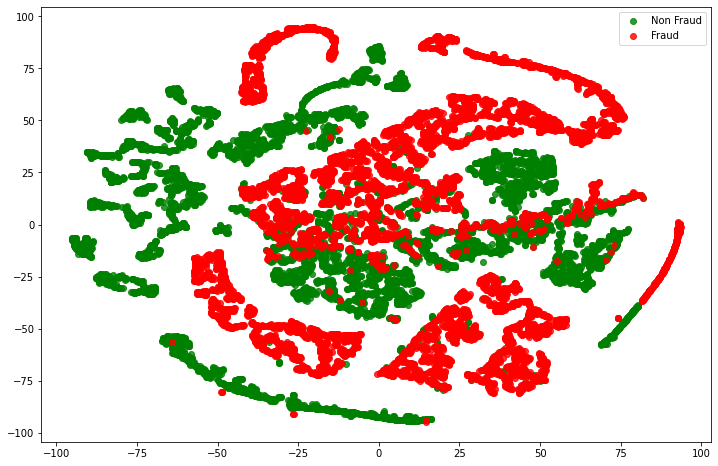

In [ ]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
    
tsne_plot(X, y, "original.png")

Cada ponto representa uma transação, através do gráfico podemos ver que os pontos estão muito perto entre si, não é possível fazer uma distinção entre eles.

## Regressão logistica

Vamos usar 4 classificadores e decidir qual deles é mais efetivo. Usaremos modelos baseline e depois utilizaremos gridsearch para tunar estes algoritmos.

In [ ]:
# Realiza a separação dos dados entre dados de treino e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Para realizar o experimento iremos utilizar 4 algoritmos, [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [XGB](https://xgboost.readthedocs.io/en/stable/), [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) e [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Nós instanciaremos os algoritmos e os colocaremos em um dicionário. Usaremos um loop **for** para fitar cada um deles e saber sua acurácia através do método de validação cruzada. 

In [ ]:
# Vamos implementar os classificadores e ver a performance de cada um
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "xgb": XGBClassifier(),
    "Support Vector Classifier": SVC(),
    "RandomForest": RandomForestClassifier()
}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f"Classifiers: {classifier.__class__.__name__} has a training score of {round(training_score.mean(), 2) * 100} % accuracy score")

Classifiers: LogisticRegression has a training score of 94.0 % accuracy score
Classifiers: XGBClassifier has a training score of 99.0 % accuracy score
Classifiers: SVC has a training score of 92.0 % accuracy score
Classifiers: RandomForestClassifier has a training score of 99.0 % accuracy score


##GridSearch

Temos uma performance muito boa, porém vamos utilizar o [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) e ver se conseguimos melhorará-la. 

In [ ]:
# Vamos utilizar o gridsearch

# Regressão Logística 
log_reg_params = {'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
log_reg_search = GridSearchCV(LogisticRegression(), log_reg_params)
log_reg_search.fit(X_train, y_train)
# Pegamos os melhores parametros automaticamente
log_reg_best = log_reg_search.best_estimator_

# Parametros para XGB
XGB_params = {'booster': ['gbtree', 'gblinear', 'dart'], 'lambda': [0.3, 0,5, 1, 3, 5]}
XGB_search = GridSearchCV(XGBClassifier(), XGB_params)
XGB_search.fit(X_train, y_train)
XGB_best = XGB_search.best_estimator_

# SVC
SVC_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
SVC_search = GridSearchCV(SVC(), SVC_params)
SVC_search.fit(X_train, y_train)
SVC_best = SVC_search.best_estimator_

# Random Forest
RF_params = {'criterion': ['gini', 'entropy', 'log_loss'], 'max_features': ['sqrt', 'log2', None], 'class_weight': ['balanced', 'balanced_subsample']}
RF_search = GridSearchCV(RandomForestClassifier(), RF_params)
RF_search.fit(X_train, y_train)
RF_best = RF_search.best_estimator_

In [ ]:
#Vamos ver a acuracia utilizando validação cruzada

log_reg_score = cross_val_score(log_reg_best, X_train, y_train, cv=5)
print(f'Score Regressão logistica: {round(log_reg_score.mean() * 100, 2)} %')

XGB_score = cross_val_score(XGB_best, X_train, y_train, cv=5)
print(f'Score XGB: {round(XGB_score.mean() * 100, 2)} %')

SVC_score = cross_val_score(SVC_best, X_train, y_train, cv=5)
print(f'Score SVC: {round(SVC_score.mean() * 100, 2)} %')

RF_score = cross_val_score(RF_best, X_train, y_train, cv=5)
print(f'Score Random Forest: {round(RF_score.mean() * 100, 2)} %')

Score Regressão logistica: 94.76 %
Score XGB: 98.57 %
Score SVC: 94.66 %
Score Random Forest: 99.31 %


Tivemos uma melhora de 0.3% na Random Forest, o que é muito bom. Vamos plotar as curvas de aprendizado de cada um para saber se está acontecendo overffiting. 

## Curvas de aprendizado

[Curva de aprendizado.](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)

Determina as pontuações de treinamento e teste com validação cruzada para diferentes tamanhos de conjunto de treinamento.

Um gerador de validação cruzada divide todo o conjunto de dados k vezes nos dados de treinamento e teste. Subconjuntos do conjunto de treinamento com tamanhos variados serão usados ​​para treinar o estimador e uma pontuação para cada tamanho de subconjunto de treinamento e o conjunto de teste serão computados. Depois, as pontuações serão calculadas sobre todas as k execuções para cada tamanho de subconjunto de treinamento.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

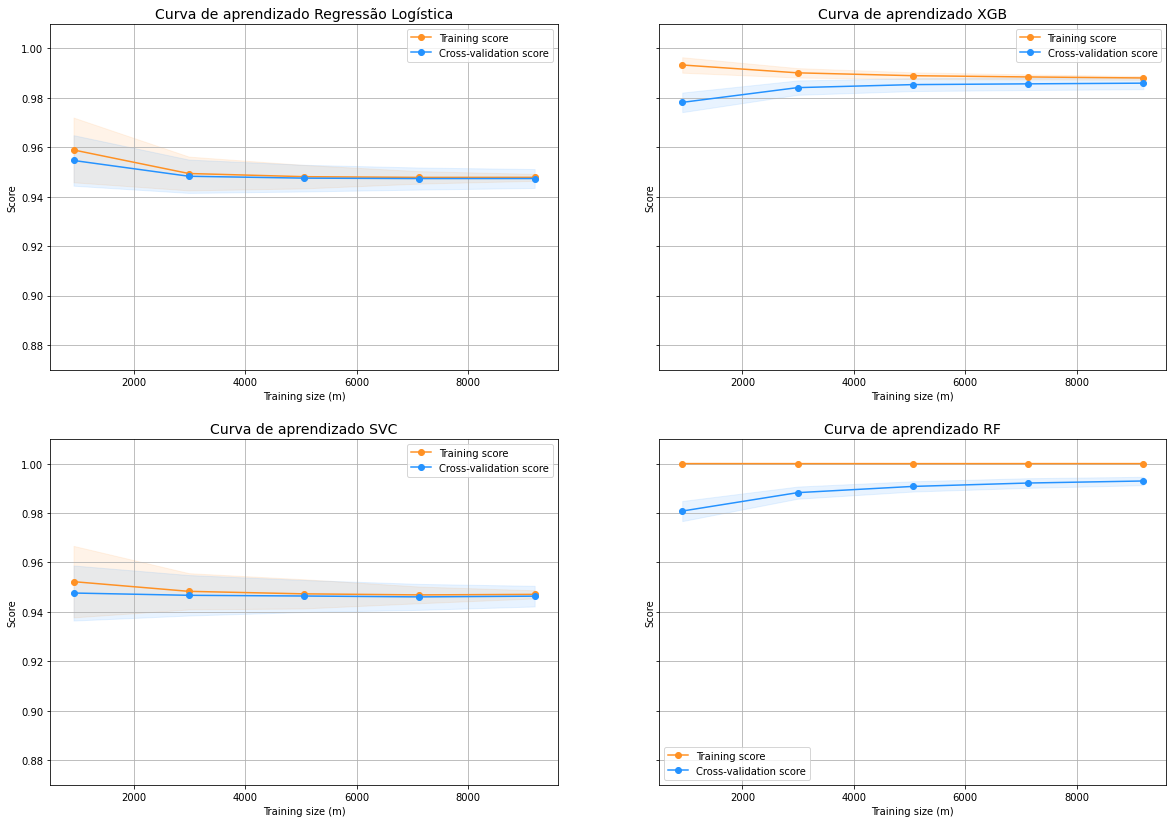

In [ ]:
def curva_aprendizado(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

  f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
  if ylim is not None:
      plt.ylim(*ylim)

  # Primeiro algoritmo
  train_sizes, train_scores, test_scores = learning_curve(estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  ax1.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
  ax1.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
  ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
  ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
  ax1.set_title("Curva de aprendizado Regressão Logística", fontsize=14)
  ax1.set_xlabel('Training size (m)')
  ax1.set_ylabel('Score')
  ax1.grid(True)
  ax1.legend(loc="best")

  # Segundo algoritmo
  train_sizes, train_scores, test_scores = learning_curve(estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  ax2.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
  ax2.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
  ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
  ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
  ax2.set_title("Curva de aprendizado XGB", fontsize=14)
  ax2.set_xlabel('Training size (m)')
  ax2.set_ylabel('Score')
  ax2.grid(True)
  ax2.legend(loc="best")

  # Terceiro algoritmo
  train_sizes, train_scores, test_scores = learning_curve(estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  ax3.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
  ax3.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
  ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
  ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
  ax3.set_title("Curva de aprendizado SVC", fontsize=14)
  ax3.set_xlabel('Training size (m)')
  ax3.set_ylabel('Score')
  ax3.grid(True)
  ax3.legend(loc="best")

  # Fourth Estimator
  train_sizes, train_scores, test_scores = learning_curve(estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  ax4.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
  ax4.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
  ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
  ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
  ax4.set_title("Curva de aprendizado RF", fontsize=14)
  ax4.set_xlabel('Training size (m)')
  ax4.set_ylabel('Score')
  ax4.grid(True)
  ax4.legend(loc="best")

  return plt

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
curva_aprendizado(log_reg_best, XGB_best, SVC_best, RF_best, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

Através das curvas de aprendizado podemos ver que os nossos algoritmos generalizam muito bem, não existe uma grande diferença entre o score de treino e o score de validação cruzada, ou seja, não está acontecendo overfitting. 

## Curva ROC

Agora vamos ver a curva ROC e comparar os algoritimos 

In [ ]:
# Vamos criar um dataframe com todos os scores e os nomes dos classificadores 

log_reg_pred = cross_val_predict(log_reg_best, X_train, y_train, cv=5, method="decision_function")

XGB_pred = cross_val_predict(XGB_best, X_train, y_train, cv=5)

SVC_pred = cross_val_predict(SVC_best, X_train, y_train, cv=5, method="decision_function")

RF_pred = cross_val_predict(RF_best, X_train, y_train, cv=5)

In [ ]:
# Vamos plotar os resultados 

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, XGB_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, SVC_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, RF_pred))

Logistic Regression:  0.9883456850218226
KNears Neighbors:  0.9857065560260686
Support Vector Classifier:  0.9871392044405023
Decision Tree Classifier:  0.9930296737945792


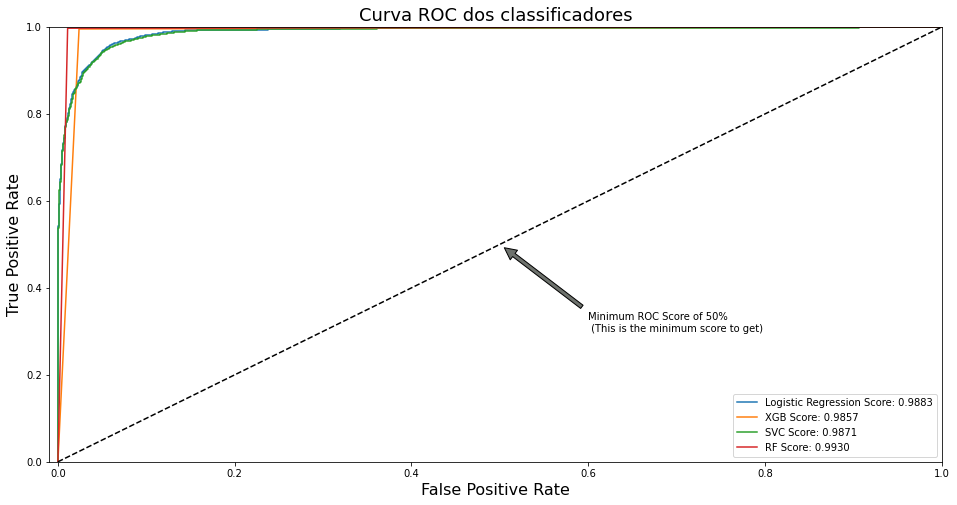

In [ ]:
# fpr = Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i]
# tpr = Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i]
# threshold = Decreasing thresholds on the decision function used to compute fpr and tpr. thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1

log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
XGB_fpr, XGB_tpr, knear_threshold = roc_curve(y_train, XGB_pred)
SVC_fpr, SVC_tpr, svc_threshold = roc_curve(y_train, SVC_pred)
RF_fpr, RF_tpr, tree_threshold = roc_curve(y_train, RF_pred)

def multipla_curva_roc(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
  plt.figure(figsize=(16,8))
  plt.title('Curva ROC dos classificadores', fontsize=18)
  plt.plot(log_fpr, log_tpr, label='Logistic Regression Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
  plt.plot(XGB_fpr, XGB_tpr, label='XGB Score: {:.4f}'.format(roc_auc_score(y_train, XGB_pred)))
  plt.plot(SVC_fpr, SVC_tpr, label='SVC Score: {:.4f}'.format(roc_auc_score(y_train, SVC_pred)))
  plt.plot(RF_fpr, RF_tpr, label='RF Score: {:.4f}'.format(roc_auc_score(y_train, RF_pred)))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([-0.01, 1, 0, 1])
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)
  plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3), arrowprops=dict(facecolor='#6E726D', shrink=0.05),
              )
  plt.legend()
    
multipla_curva_roc(log_fpr, log_tpr, XGB_fpr, XGB_tpr, SVC_fpr, SVC_tpr, RF_fpr, RF_tpr)
plt.show()

Nossos algoritmos estão cum uma performance muito boa, boa até demais. Vamos nas previsôes realizadas por cada um deles.

In [ ]:
# Predições usando regressão logistica
y_pred_log_reg = log_reg_best.predict(X_test)

# Predições usando XGB
y_pred_xgb = XGB_best.predict(X_test)

#Predições usando XGB
y_pred_svc = SVC_best.predict(X_test)

# Predições usando Random Forest
y_pred_rf = RF_best.predict(X_test)

# Resultados para plotar a matrix de confusão de cada algoritmo 
log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
xgb_cf = confusion_matrix(y_test, y_pred_xgb)
svc_cf = confusion_matrix(y_test, y_pred_svc)
rf_cf = confusion_matrix(y_test, y_pred_rf)

In [ ]:
print('Regressão Logistica:')
print(classification_report(y_test, y_pred_log_reg))
print (f'Acuracia: {accuracy_score(y_test, y_pred_log_reg)}')
log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)

print('\n XGB:')
print(classification_report(y_test, y_pred_xgb))
print (f'Acuracia: {accuracy_score(y_test, y_pred_xgb)}')
xgb_cf = confusion_matrix(y_test, y_pred_xgb)

print('\n SVC:')
print(classification_report(y_test, y_pred_svc))
print (f'Acuracia: {accuracy_score(y_test, y_pred_svc)}')
svc_cf = confusion_matrix(y_test, y_pred_svc)

print('\n Random Forest:')
print(classification_report(y_test, y_pred_rf))
print (f'Acuracia: {accuracy_score(y_test, y_pred_rf)}')
rf_cf = confusion_matrix(y_test, y_pred_rf)

Regressão Logistica:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2482
           1       0.95      0.95      0.95      2446

    accuracy                           0.95      4928
   macro avg       0.95      0.95      0.95      4928
weighted avg       0.95      0.95      0.95      4928

Acuracia: 0.9500811688311688

 XGB:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2482
           1       0.98      1.00      0.99      2446

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928

Acuracia: 0.9862012987012987

 SVC:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2482
           1       0.95      0.95      0.95      2446

    accuracy                           0.95      4928
   macro avg       0.95      0.95  

Text(0.5, 1.0, 'Random Forest \n Confusion Matrix')

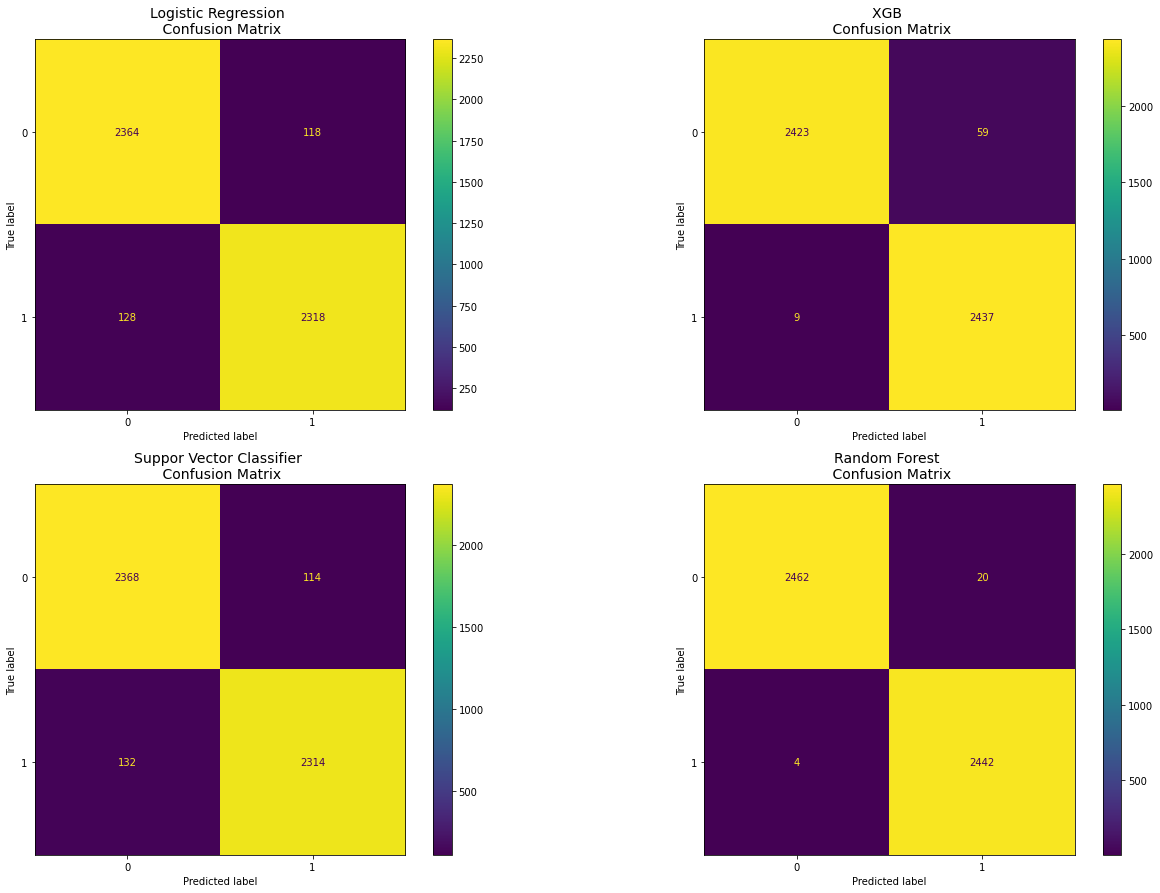

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(2, 2,figsize=(22,15))

ConfusionMatrixDisplay.from_estimator(log_reg_best, X_test, y_test, ax=ax[0][0])
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)

ConfusionMatrixDisplay.from_estimator(XGB_best, X_test, y_test, ax=ax[0][1])
ax[0][1].set_title("XGB \n Confusion Matrix", fontsize=14)

ConfusionMatrixDisplay.from_estimator(SVC_best, X_test, y_test, ax=ax[1][0])
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)

ConfusionMatrixDisplay.from_estimator(RF_best, X_test, y_test, ax=ax[1][1])
ax[1][1].set_title("Random Forest \n Confusion Matrix", fontsize=14)


## Conclusão 

Relembrando as perguntas feitas no inicío deste notebook:

* Quais variáveis valem a pena serem mantidas?

* Qual modelo de classificação melhor se adapta ao nosso projeto?

* Seu custo computacional vale a pena?

*  Quais observações podem ser feitas com relação aos impactos dos falsos positivos e falsos negativos?

Vamos responde-las por ordem. Todas as variáveis numéricas foram mantidas e a variável categórica **type**, deletamos **isFlaggedFraud** pois ela possuía um desbalanceamento muito grande, já as variáveis **nameOrig**, **nameDest** possuiam uma cardinalidade muito grande, se usassemos OneHotEncoder ou get_dummies em tais variáveis teríamos um grande número de colunas o que prejudicaria o aprendizado do modelo. 

O modelo escolhido foi Random Forest pois ele possui uma performance superior aos outros além de generalizar muito bem. 

Seu custo computacional não é alto, afinal é um ensemble muito bem projetado, quando utilizado corretamente nos traz resultados excelentes, em algumas situações, semelhante a uma rede neural.

O impacto de falsos positivos no nosso caso seria: a transação é normal e o nosso modelo classifica como fraudulenta. Já o falso negativo seria: A transação é fraudulenta e classicamos como normal, ambos os casos são péssimos para o banco, porém falsos negativos são piores. Caso fôssemos um cliente que teve sua transação marcada como fraudulenta, ligariamos para o banco para que nosso problema fosse resolvido, o banco não perderia dinheiro para ressarcir o cliente que teve uma transação fraudulenta aprovada. 

Vale a pena lembrar que estes foram criados para este desafio, ou seja, com um EDA mais detalhado notamos várias inconsistências no dataset, como saldo anterior igual a 0, após um saque o saldo da conta fica maior, a conta de destino possui um saldo menor após a transação ser realizada. Uma remoção de outliers poderia ser feita para sabermos de o modelo iria ter uma performace melhor, entretanto este é um projeto pessoal e na minha modesta opinião obtivemos resultados muito bons. 

